### Indice
* [ Librarys](#1)
    <br>

* [Dataset](#1)
    <br>
    
* [data_trasnform](#2)

    <br>

* [Study_1:   n_estimators, colsample_bytree](#3)
    <br>
    
    * [Objective Study XGBoost](#1.1)
    * [Best trial]()
    * [Plot_optimization_history](#1.1)
    * [Plot_param_importances]()
    * [plot_parallel_coordinate]()
<br>
<br>
* [Study_2:  eta (learning rate), max_depth, gamma](#3)
    <br>
    
    * [Objective Study XGBoost](#1.1)
    * [Best trial]()
    * [Plot_optimization_history](#1.1)
    * [Plot_param_importances]()
    * [plot_parallel_coordinate]()
<br>
<br>
* [Marge Studys and Save Json](#3)

In [116]:
#Standar Librarys
import pandas as pd
import numpy as np
import scipy
import optuna
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix

# data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# remove warnings
import warnings
warnings.filterwarnings('ignore')

#utis 
from utils import *

#model Optimizer
from xgboost import XGBClassifier

In [2]:
#================= data===========================#
df = pd.read_csv('../data/bank-additional-full.csv',sep = ';')
df.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
X,y = data_trasnform(df, smote=False)

    Study_1 , with the Hyperpameters:  n_estimators, colsample_bytree

In [4]:
#==========================OPTUNA -- XGB ===========================#
def objective(trial,data=X,target=y): #objetevie_xgb
    
     #max_depth, n_estiamtoders, max_feature
    
    # hyperparameter 
    param = {
        'tree_method':'gpu_hist',# this parameter means using the GPU when training our model to speedup the training process
        'n_estimators': trial.suggest_int("n_estimators", 1000, 10000), #
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0) #max_feature
    }
    
    #==================kfold=====================#
    skf = StratifiedKFold(n_splits=10)
    model_XGB = XGBClassifier(**param)
    accuracies = []

    for idx in skf.split(X, y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = X[train_idx]
        ytrain = y[train_idx]

        xtest = X[test_idx]
        ytest = y[test_idx]

        model_XGB.fit(xtrain,ytrain)
        preds = model_XGB.predict(xtest)
        fold_acc = recall_score(ytest, preds)
        accuracies.append(fold_acc)
        
    return scipy.stats.gmean(accuracies) #media geometrica spipy

In [5]:
study = optuna.create_study(direction='maximize') #maxizer
study.optimize(objective, n_trials=100) #100
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-11-06 14:31:35,495] A new study created in memory with name: no-name-846ada46-ef8c-489f-841f-4b2233a4652a
[I 2022-11-06 14:36:09,616] Trial 0 finished with value: 0.051961502119569104 and parameters: {'n_estimators': 6478, 'colsample_bytree': 0.2532392629892587}. Best is trial 0 with value: 0.051961502119569104.
[I 2022-11-06 14:42:37,658] Trial 1 finished with value: 0.05219206929614197 and parameters: {'n_estimators': 7585, 'colsample_bytree': 0.9428719870850388}. Best is trial 1 with value: 0.05219206929614197.
[I 2022-11-06 14:48:27,684] Trial 2 finished with value: 0.0497227438605054 and parameters: {'n_estimators': 5243, 'colsample_bytree': 0.8590999646040955}. Best is trial 1 with value: 0.05219206929614197.
[I 2022-11-06 14:55:24,553] Trial 3 finished with value: 0.04820099281570735 and parameters: {'n_estimators': 6739, 'colsample_bytree': 0.8228967245198189}. Best is trial 1 with value: 0.05219206929614197.
[I 2022-11-06 15:02:27,256] Trial 4 finished with value: 0.04

[I 2022-11-06 20:47:36,990] Trial 37 finished with value: 0.049050443802930103 and parameters: {'n_estimators': 8943, 'colsample_bytree': 0.853787415176024}. Best is trial 34 with value: 0.05247951974730442.
[I 2022-11-06 20:54:02,224] Trial 38 finished with value: 0.050756671051042784 and parameters: {'n_estimators': 8374, 'colsample_bytree': 0.9818780406942343}. Best is trial 34 with value: 0.05247951974730442.
[I 2022-11-06 21:01:03,157] Trial 39 finished with value: 0.047470404515538876 and parameters: {'n_estimators': 9512, 'colsample_bytree': 0.8151518274434602}. Best is trial 34 with value: 0.05247951974730442.
[I 2022-11-06 21:07:41,838] Trial 40 finished with value: 0.05220654900274004 and parameters: {'n_estimators': 8763, 'colsample_bytree': 0.9307306343863541}. Best is trial 34 with value: 0.05247951974730442.
[I 2022-11-06 21:14:23,212] Trial 41 finished with value: 0.0521052722395234 and parameters: {'n_estimators': 8845, 'colsample_bytree': 0.9405885869613569}. Best is t

[I 2022-11-07 02:02:59,241] Trial 75 finished with value: 0.05058506069823502 and parameters: {'n_estimators': 8442, 'colsample_bytree': 0.9071607284964174}. Best is trial 34 with value: 0.05247951974730442.
[I 2022-11-07 02:07:46,950] Trial 76 finished with value: 0.04847942305977425 and parameters: {'n_estimators': 6251, 'colsample_bytree': 0.9969444582911303}. Best is trial 34 with value: 0.05247951974730442.
[I 2022-11-07 02:13:09,701] Trial 77 finished with value: 0.050411585397937504 and parameters: {'n_estimators': 7190, 'colsample_bytree': 0.9478108623382635}. Best is trial 34 with value: 0.05247951974730442.
[I 2022-11-07 02:18:51,432] Trial 78 finished with value: 0.050449853410721134 and parameters: {'n_estimators': 7757, 'colsample_bytree': 0.8797324037060175}. Best is trial 34 with value: 0.05247951974730442.
[I 2022-11-07 02:23:56,789] Trial 79 finished with value: 0.05232984813172914 and parameters: {'n_estimators': 6782, 'colsample_bytree': 0.9241197935508423}. Best is 

Number of finished trials: 100
Best trial: {'n_estimators': 8212, 'colsample_bytree': 0.9294650104948371}


In [18]:
study_1 = study.best_trial.params
study_1

{'n_estimators': 8212, 'colsample_bytree': 0.9294650104948371}

In [8]:
optuna.visualization.plot_optimization_history(study)

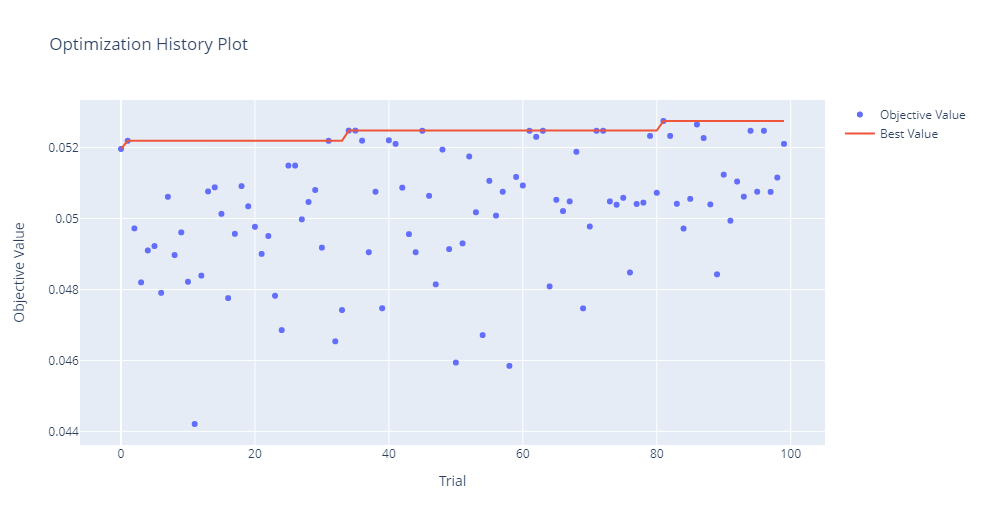

In [11]:
optuna.visualization.plot_param_importances(study)

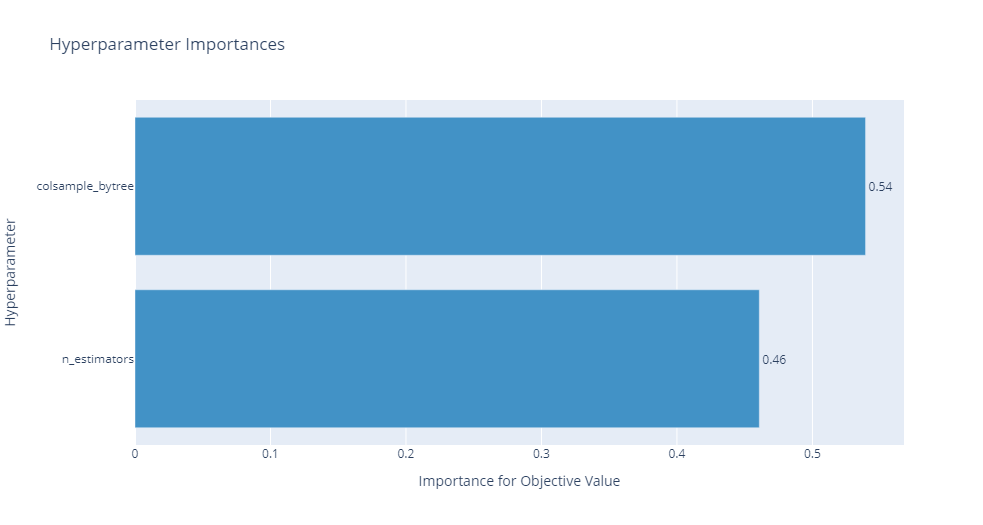

In [12]:
optuna.visualization.plot_parallel_coordinate(study)

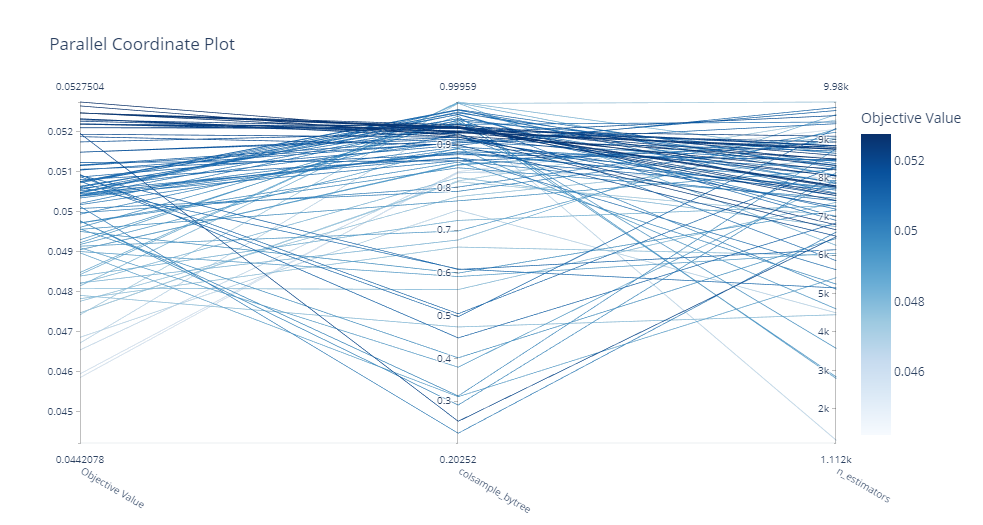

    Study_2 , with the Hyperpameters:  eta (learning rate), max_depth, gamma

In [101]:
#==========================OPTUNA -- XGB ===========================#
def objective(trial,data=X,target=y): #objetevie_xgb
    
     #max_depth, n_estiamtoders, max_feature
    
    # hyperparameter 
    param = {
        'tree_method':'gpu_hist',# this parameter means using the GPU when training our model to speedup the training process
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0), #
        "eta": trial.suggest_float("eta", 0.2, 0.7),#learning rate
        'max_depth': trial.suggest_int('max_depth', 1, 9)
    }
    
    #==================kfold=====================#
    skf = StratifiedKFold(n_splits=10)
    model_XGB = XGBClassifier(**param)
    accuracies = []

    for idx in skf.split(X, y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = X[train_idx]
        ytrain = y[train_idx]

        xtest = X[test_idx]
        ytest = y[test_idx]

        model_XGB.fit(xtrain,ytrain)
        preds = model_XGB.predict(xtest)
        fold_acc = recall_score(ytest, preds)
        accuracies.append(fold_acc)
        
    return scipy.stats.gmean(accuracies) #media geometrica spipy

In [102]:
study = optuna.create_study(direction='maximize') #maxizer
study.optimize(objective, n_trials=100) #100
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-11-07 14:23:56,245] A new study created in memory with name: no-name-1d5c3161-fada-4624-84ef-59323998cbf2
[I 2022-11-07 14:23:59,734] Trial 0 finished with value: 0.04070190519430709 and parameters: {'gamma': 0.0009170054773494548, 'eta': 0.277863656616983, 'max_depth': 4}. Best is trial 0 with value: 0.04070190519430709.
[I 2022-11-07 14:24:02,976] Trial 1 finished with value: 0.04261892465357355 and parameters: {'gamma': 1.3896950345547724e-05, 'eta': 0.6022278686190892, 'max_depth': 4}. Best is trial 1 with value: 0.04261892465357355.
[I 2022-11-07 14:24:04,813] Trial 2 finished with value: 0.0 and parameters: {'gamma': 8.66460500162503e-06, 'eta': 0.328956890361074, 'max_depth': 1}. Best is trial 1 with value: 0.04261892465357355.
[I 2022-11-07 14:24:07,462] Trial 3 finished with value: 0.035321728983424866 and parameters: {'gamma': 2.2262160356537005e-08, 'eta': 0.22955873983126612, 'max_depth': 3}. Best is trial 1 with value: 0.04261892465357355.
[I 2022-11-07 14:24:09,98

[I 2022-11-07 14:28:52,935] Trial 35 finished with value: 0.043052488011103514 and parameters: {'gamma': 1.5579097936751687e-07, 'eta': 0.6772302044269627, 'max_depth': 5}. Best is trial 26 with value: 0.058252317896869354.
[I 2022-11-07 14:29:02,470] Trial 36 finished with value: 0.05226086587023095 and parameters: {'gamma': 3.5943957652281725e-05, 'eta': 0.5392478344725913, 'max_depth': 7}. Best is trial 26 with value: 0.058252317896869354.
[I 2022-11-07 14:29:20,423] Trial 37 finished with value: 0.04965493006299231 and parameters: {'gamma': 1.0854331210475264e-08, 'eta': 0.6066180688099317, 'max_depth': 9}. Best is trial 26 with value: 0.058252317896869354.
[I 2022-11-07 14:29:27,351] Trial 38 finished with value: 0.04568950133224618 and parameters: {'gamma': 2.3937283584896245e-07, 'eta': 0.5744139209676298, 'max_depth': 6}. Best is trial 26 with value: 0.058252317896869354.
[I 2022-11-07 14:29:40,664] Trial 39 finished with value: 0.04663865243005052 and parameters: {'gamma': 4.9

[I 2022-11-07 14:37:56,153] Trial 70 finished with value: 0.051612334063679086 and parameters: {'gamma': 4.9211578197812464e-05, 'eta': 0.5681457406811897, 'max_depth': 9}. Best is trial 26 with value: 0.058252317896869354.
[I 2022-11-07 14:38:08,737] Trial 71 finished with value: 0.049753134511446064 and parameters: {'gamma': 1.040926555446239e-06, 'eta': 0.6700214095430493, 'max_depth': 7}. Best is trial 26 with value: 0.058252317896869354.
[I 2022-11-07 14:38:26,316] Trial 72 finished with value: 0.05219399724414792 and parameters: {'gamma': 5.531488054519818e-06, 'eta': 0.6398585676529441, 'max_depth': 8}. Best is trial 26 with value: 0.058252317896869354.
[I 2022-11-07 14:38:38,586] Trial 73 finished with value: 0.05223417966968069 and parameters: {'gamma': 2.1128049550014694e-06, 'eta': 0.5923169762358167, 'max_depth': 7}. Best is trial 26 with value: 0.058252317896869354.
[I 2022-11-07 14:38:55,901] Trial 74 finished with value: 0.05962422147971367 and parameters: {'gamma': 0.00

Number of finished trials: 100
Best trial: {'gamma': 0.0008063171490771039, 'eta': 0.6873165675063626, 'max_depth': 8}


In [103]:
study_2 = study.best_trial.params
study_2

{'gamma': 0.0008063171490771039, 'eta': 0.6873165675063626, 'max_depth': 8}

In [142]:
optuna.visualization.plot_optimization_history(study)

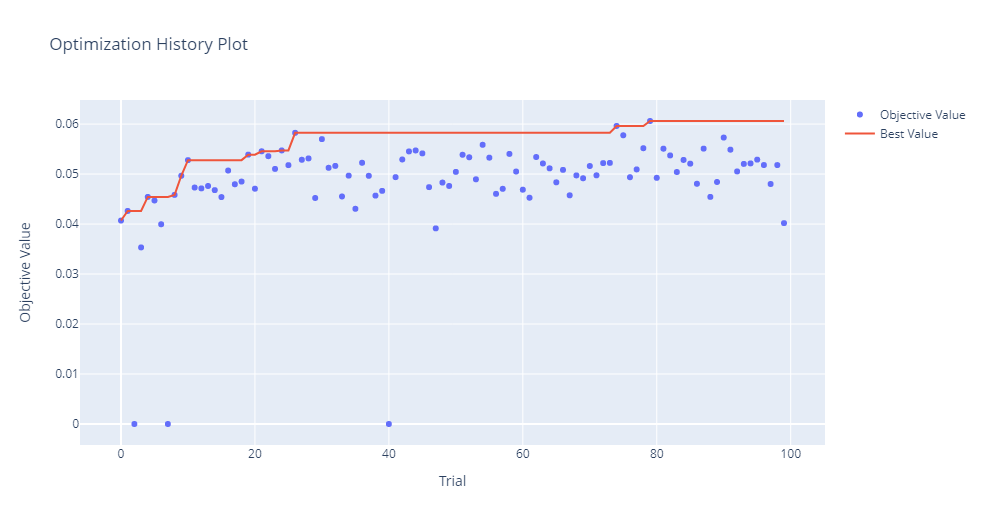

In [105]:
optuna.visualization.plot_param_importances(study)

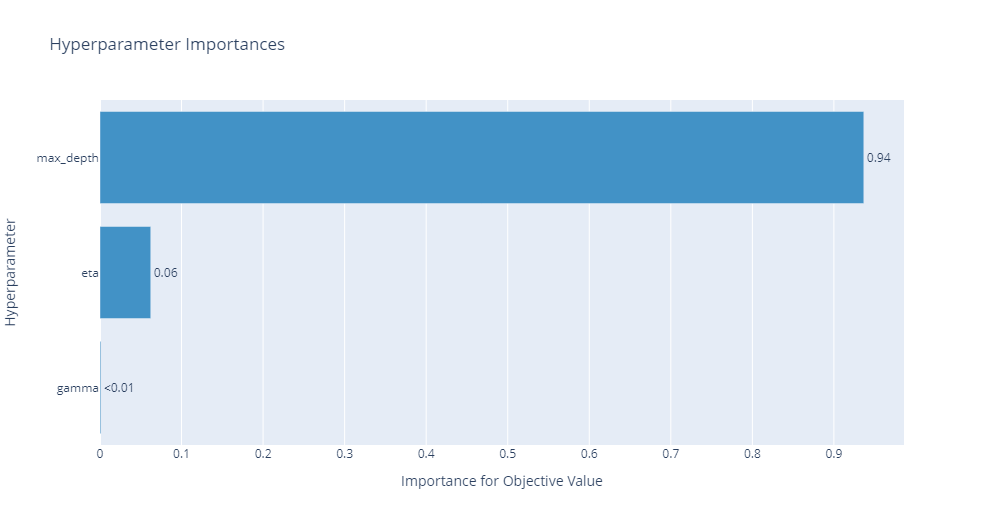

In [106]:
optuna.visualization.plot_parallel_coordinate(study)

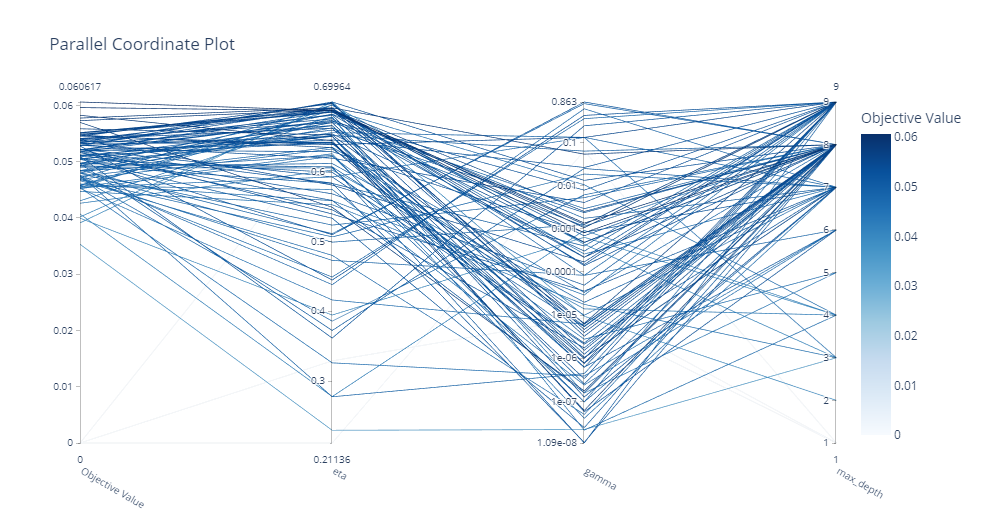

In [139]:
XGBoost_hyperparameter = study_1 | study_2
XGBoost_hyperparameter

{'n_estimators': 8212,
 'colsample_bytree': 0.9294650104948371,
 'gamma': 0.0008063171490771039,
 'eta': 0.6873165675063626,
 'max_depth': 8}

In [141]:
save_hyperameter_json(XGBoost_hyperparameter, '../best_params_models/XGBoost_hyperparameter.json')

Save ready
